# Introduction

This notebook demonstrates the new capabilities introduced in `Amazon Titan Image Generator v2`, a powerful tool for generating and manipulating images using text prompts and reference visuals.

Specifically, in this notebook, we will be focusing on **Background Removal** feature, which automatically removes backgrounds from images containing multiple objects, isolating the foreground subjects.


# Pre-requisite

Before diving into the code examples, ensure you have the following

- An AWS account with access to Amazon Bedrock

- Enable Titan Image Generator v2 model access in Amazon Bedrock

- The necessary IAM permissions to invoke Amazon Bedrock models

- AWS SDK for Python (Boto3) installed


In [ ]:
%pip install boto3 numpy pillow matplotlib --quiet

In [ ]:
# restart kernel
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>")

In [ ]:
import base64
import io
import json
import logging
import boto3
import numpy as np

from PIL import Image
from io import BytesIO
from pathlib import Path
from matplotlib import pyplot as plt

bedrock_runtime_client = boto3.client("bedrock-runtime")

In [ ]:
# Define function for display
def plot_images(ref_image_path, base_images):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    reference_image = Image.open(ref_image_path)
    max_size = (300,300)
    reference_image.thumbnail(max_size)
    
    axes[0].imshow(np.array(reference_image))
    axes[0].set_title('Original Image\n')
    axes[0].axis('off')

    axes[1].imshow(np.array(base_images[0]))
    axes[1].set_title('Processed Image without Background')
    axes[1].axis('off')

    plt.show()

In [ ]:
# Define function to save the output
def save_image(base64_image, output_file):
    image_bytes = base64.b64decode(base64_image)
    image = Image.open(io.BytesIO(image_bytes))
    image.save(output_file)

### Background Removal

Background removal automatically removes the background from images containing multiple objects. This feature intelligently detects and segments foreground objects, isolating main elements with details.

In [ ]:
# Define image needs to be processed and path to store the generated images
reference_image_path = "Data/iguana.png"

# Create output folder and specify output path
Path("Output/").mkdir(parents=True, exist_ok=True)
output_save_path = "Output/iguana.png" 

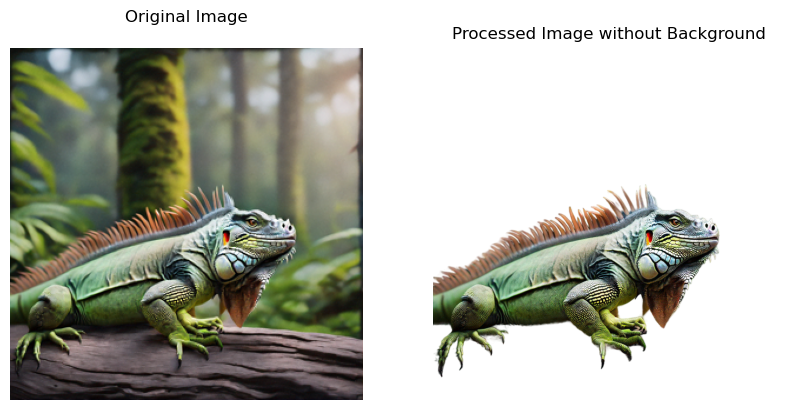

In [5]:
# Read image from file and encode it as base64 string.
with open(reference_image_path, "rb") as image_file:
    input_image = base64.b64encode(image_file.read()).decode('utf8')

body = json.dumps({
    "taskType": "BACKGROUND_REMOVAL",
    "backgroundRemovalParams": {
        "image": input_image,
    }
})

response = bedrock_runtime_client.invoke_model(
    body=body, 
    modelId="amazon.titan-image-generator-v2:0",
    accept="application/json", 
    contentType="application/json"
)

response_body = json.loads(response.get("body").read())
response_images = [
    Image.open(io.BytesIO(base64.b64decode(base64_image)))
    for base64_image in response_body.get("images")
]

# save output
save_image(response_body.get("images")[0], output_save_path)

# plot output
plot_images(reference_image_path, response_images)

# Take Away

Amazon Titan Image Generator v2 introduces advanced features such as image conditioning, color conditioning and background removal, enhacing the capabilities of AI-driven image generation. 

We encourage users to explore these new functionalities within Amazon Bedrock to experience the expanded potential for creating precise, customized visual contents.